In [1]:
using DelimitedFiles
using Plots
using Optim

In [2]:
A= readdlm("wdbc.txt",',','\n')

569×32 Array{Float64,2}:
 842302.0        0.0  17.99   10.38  …  0.7119  0.2654   0.4601  0.1189
 842517.0        0.0  20.57   17.77     0.2416  0.186    0.275   0.08902
      8.43009e7  0.0  19.69   21.25     0.4504  0.243    0.3613  0.08758
      8.43483e7  0.0  11.42   20.38     0.6869  0.2575   0.6638  0.173
      8.43584e7  0.0  20.29   14.34     0.4     0.1625   0.2364  0.07678
 843786.0        0.0  12.45   15.7   …  0.5355  0.1741   0.3985  0.1244
 844359.0        0.0  18.25   19.98     0.3784  0.1932   0.3063  0.08368
      8.44582e7  0.0  13.71   20.83     0.2678  0.1556   0.3196  0.1151
 844981.0        0.0  13.0    21.82     0.539   0.206    0.4378  0.1072
      8.4501e7   0.0  12.46   24.04     1.105   0.221    0.4366  0.2075
 845636.0        0.0  16.02   23.24  …  0.1459  0.09975  0.2948  0.08452
      8.461e7    0.0  15.78   17.89     0.3965  0.181    0.3792  0.1048
 846226.0        0.0  19.17   24.8      0.3639  0.1767   0.3176  0.1023
      ⋮                            

In [3]:
y= Int.(A[:,2])
X= A[:,3:12]
N= length(y)
X_ungthu= [ones(N) X]

569×11 Array{Float64,2}:
 1.0  17.99   10.38  122.8   1001.0  …  0.3001   0.1471   0.2419  0.07871
 1.0  20.57   17.77  132.9   1326.0     0.0869   0.07017  0.1812  0.05667
 1.0  19.69   21.25  130.0   1203.0     0.1974   0.1279   0.2069  0.05999
 1.0  11.42   20.38   77.58   386.1     0.2414   0.1052   0.2597  0.09744
 1.0  20.29   14.34  135.1   1297.0     0.198    0.1043   0.1809  0.05883
 1.0  12.45   15.7    82.57   477.1  …  0.1578   0.08089  0.2087  0.07613
 1.0  18.25   19.98  119.6   1040.0     0.1127   0.074    0.1794  0.05742
 1.0  13.71   20.83   90.2    577.9     0.09366  0.05985  0.2196  0.07451
 1.0  13.0    21.82   87.5    519.8     0.1859   0.09353  0.235   0.07389
 1.0  12.46   24.04   83.97   475.9     0.2273   0.08543  0.203   0.08243
 1.0  16.02   23.24  102.7    797.8  …  0.03299  0.03323  0.1528  0.05697
 1.0  15.78   17.89  103.6    781.0     0.09954  0.06606  0.1842  0.06082
 1.0  19.17   24.8   132.4   1123.0     0.2065   0.1118   0.2397  0.078
 ⋮             

In [6]:
# xây dựng hàm sigmoid
function sigmoid(X, θ)
    g=1 ./ (1 .+ exp.(-(X*θ)))
    return g
end

sigmoid (generic function with 1 method)

In [27]:
# xây dựng hàm loss function 
function loss(X, y,θ)
    N,D= size(X)
    g=sigmoid(X,θ)
    l=y'*log.(g) + (1 .- y)'*log.(1 .- g)
    J= -l/N
    return J
end

loss (generic function with 1 method)

In [9]:
# xây dựng hàm tính gradient
function gradient(X,y,θ)
    ∇=(X'*(sigmoid(X,θ) - y))/length(y)
    return ∇
end

gradient (generic function with 1 method)

In [41]:
# xây dựng hàm train
function train(X, y, α=0.01, maxIterations= 10000)
    N,D= size(X)
    θs= zeros(maxIterations,D)
    for i= 1: maxIterations-1
        ∇= gradient(X,y,θs[i,:])
        θs[i+1,:]= θs[i,:]- α*∇
    end
    return θs
end

train (generic function with 3 methods)

In [42]:
θs= train(X_ungthu, y)

10000×11 Array{Float64,2}:
 0.0         0.0           0.0        …   0.0           0.0
 0.00127417  0.00557284    0.0159519      0.000187062   8.04524e-5
 0.00754833  0.0817821     0.128352       0.00127993    0.000474893
 0.0038225   0.0167185     0.0478558      0.000561187   0.000241357
 0.0100967   0.0929278     0.160256       0.00165406    0.000635798
 0.00637083  0.0278642     0.0797597  …   0.000935312   0.000402262
 0.012645    0.104073      0.19216        0.00202818    0.000796702
 0.00891916  0.0390099     0.111664       0.00130944    0.000563167
 0.0151933   0.115219      0.224064       0.00240231    0.000957607
 0.0114675   0.0501555     0.143567       0.00168356    0.000724071
 0.0177417   0.126365      0.255968   …   0.00277643    0.00111851
 0.0240158   0.202574      0.368368       0.0038693     0.00151295
 0.02029     0.137511      0.287871       0.00315056    0.00127942
 ⋮                                    ⋱                 ⋮
 1.09854     8.69882     -11.1454        -0

In [43]:
ts=collect(1:10000)
Js=map(t -> loss(X_ungthu,y,θs[t,:]),ts)

10000-element Array{Float64,1}:
   0.6931471805599467
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

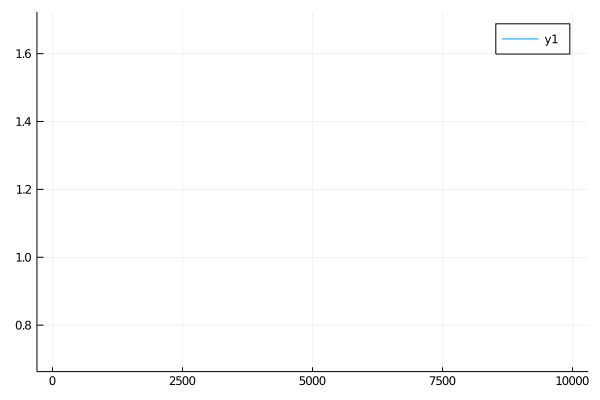

In [44]:
plot(ts,Js)